# Modèle de prévision - Machine Learning des Séries Temporelles

La problématique de ce projet réside dans la nécessité de comprendre et de prédire la consommation et la production d'énergie en Turquie sur une période de plusieurs années, en utilisant une dataset détaillée comprenant des données horaires. Cette tâche est essentielle pour assurer la stabilité et l'efficacité du réseau électrique du pays, ainsi que pour planifier efficacement l'approvisionnement en énergie et les investissements futurs dans le secteur énergétique. La complexité du paysage énergétique turc, caractérisé par une diversité de sources de production d'énergie et des variations de demande influencées par des facteurs multiples et variables, pose un défi de taille. La problématique réside donc dans la capacité à analyser et à modéliser de manière précise et efficace ces données complexes afin de fournir des prévisions fiables et exploitables pour les décideurs politiques, les gestionnaires de réseaux électriques et les acteurs du marché de l'énergie.
La dataset fournie offre une plongée détaillée dans le paysage énergétique de la Turquie entre 2018 et 2023, présentant des informations cruciales sur la consommation et la production d'énergie, ainsi que les prix associés. Avec des données horaires, elle permet une analyse granulaire des tendances et des variations dans la demande et la génération d'électricité tout au long de la période considérée. La quantité d'énergie consommée, mesurée en mégawattheures (MWh) par heure, constitue un indicateur fondamental pour évaluer les besoins énergétiques de la nation.


Pour aborder la problématique de prévision de la consommation et de la production d'énergie en Turquie, nous avons développé cinq modèles distincts, chacun apportant une approche unique à la prévision à court terme. Tout d'abord, nous avons utilisé le modèle naïve comme modèle de benchmark, fournissant ainsi une base pour évaluer la performance des autres modèles. Ensuite, nous avons exploré deux approches d'analyse univariée, à savoir ARIMA et Prophet, qui se concentrent sur la modélisation des tendances et des motifs dans les données de consommation et de production d'énergie sans tenir compte des autres variables.


Parallèlement, nous avons également mis en œuvre deux approches d'analyse multivariée, LGBM et LSTM, qui ont pris en compte les interactions entre les différentes variables pour améliorer la précision des prévisions. Ces modèles ont été particulièrement efficaces pour capturer les relations complexes entre les différentes sources de production d'énergie, les prix de l'électricité et d'autres facteurs influençant la demande énergétique.


Notre objectif principal était de réaliser des prévisions à court terme, en se concentrant spécifiquement sur la prédiction de la 6ème heure à partir des données des 5 heures précédentes. Cette approche permet une réactivité accrue aux fluctuations rapides de la demande et de la production d'énergie, ce qui est crucial pour assurer la stabilité du réseau électrique et répondre aux besoins en temps réel.
En combinant ces différentes approches, nous avons pu évaluer la performance relative de chaque modèle et identifier les méthodes les plus efficaces pour la prévision à court terme dans le contexte énergétique de la Turquie et de développer des outils et des techniques précieux pour la gestion efficace du réseau électrique et la planification énergétique dans le pays.

## Importation des librairies

In [86]:
pip install arch

In [87]:
pip install calmap

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
from arch.unitroot import PhillipsPerron
import calmap
from statsmodels.tsa.stattools import adfuller, kpss
warnings.filterwarnings("ignore")

In [89]:
df = pd.read_csv('/content/full_data.csv')
df1 = pd.read_csv('/content/full_data.csv')
df.drop(['naphtha',"total_generation_MWh"],axis=1,inplace=True)
df['time'] = pd.to_datetime(df['time'], format='%d:%m:%Y:%H:%M')
df1['time'] = pd.to_datetime(df1['time'], format='%d:%m:%Y:%H:%M')
df = df.sort_values(by='time', ascending=True)

In [90]:
#Présentation des données :
data_info = pd.DataFrame([
    ('time', "La date et l'heure de l'enregistrement des données, souvent utilisée pour tracer des données temporelles."),
    ('consumption_MWh', "La quantité d'énergie consommée en mégawattheures pendant une heure spécifique."),
    ('total_generation_MWh', "La production totale d'énergie en mégawattheures pour une heure donnée."),
    ('natural_gas', "Quantité d'énergie produite à partir du gaz naturel, mesurée en mégawattheures."),
    ('hydro_dam', "Production d'énergie provenant des barrages hydroélectriques, en mégawattheures."),
    ('lignite', "Énergie générée à partir du lignite, un type de charbon, mesurée en mégawattheures."),
    ('hydro_river', "Production d'énergie à partir des rivières, utilisant la technologie hydroélectrique, en mégawattheures."),
    ('coal_imported', "Énergie produite à partir du charbon importé, mesurée en mégawattheures."),
    ('wind', "Production d'énergie éolienne, en mégawattheures."),
    ('solar', "Énergie solaire produite, en mégawattheures."),
    ('fuel_oil', "Énergie générée à partir du fuel oil, en mégawattheures."),
    ('geothermal', "Production d'énergie géothermique, en mégawattheures."),
    ('asphaltite_coal', "Énergie produite à partir du charbon asphaltite, en mégawattheures."),
    ('hard_coal', "Production d'énergie à partir du charbon dur, en mégawattheures."),
    ('biomass', "Énergie générée à partir de la biomasse, en mégawattheures."),
    ('naphtha', "Énergie produite à partir du naphte, en mégawattheures."),
    ('LNG', "Production d'énergie à partir de gaz naturel liquéfié, en mégawattheures."),
    ('international', "Énergie importée ou exportée (cela dépend de la documentation du dataset), mesurée en mégawattheures."),
    ('waste_heat', "Production d'énergie à partir de la récupération de chaleur résiduelle, en mégawattheures."),
    ('TRY/MWh', "Le coût ou le prix de l'énergie par mégawattheure, exprimé respectivement en livres turques."),
    ('USD/MWh', "Le coût ou le prix de l'énergie par mégawattheure, exprimé respectivement en dollars américains."),
    ('EUR/MWh', "Le coût ou le prix de l'énergie par mégawattheure, exprimé respectivement en euros.")
], columns=['Colonne', 'Explication'])




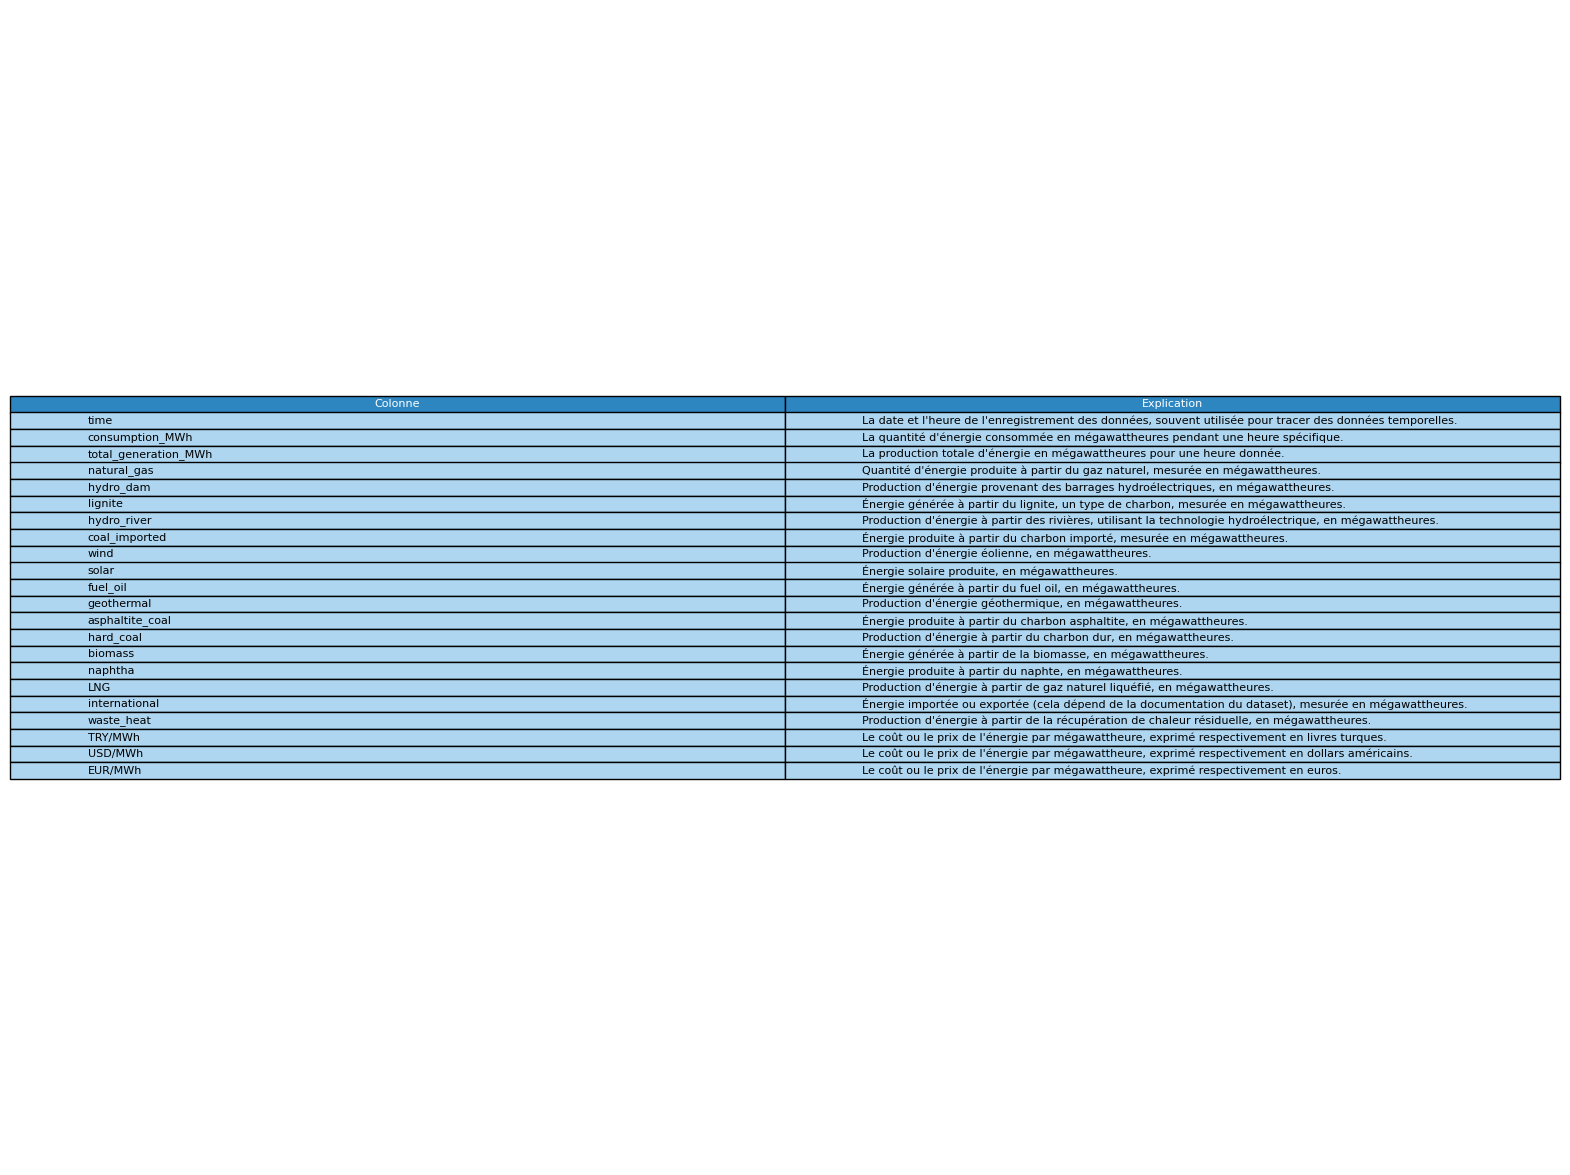

In [91]:


# Créer la figure
fig, ax = plt.subplots(figsize=(20, 15))
ax.axis('tight')
ax.axis('off')


table = ax.table(cellText=data_info.values, colLabels=data_info.columns, cellLoc='left', loc='center',
                 colColours=["#2E86C1"]*2, cellColours=[["#AED6F1"]*2]*len(data_info))

for key, cell in table.get_celld().items():
    cell.set_text_props(color='black')
    if key[0] == 0:
        cell.set_text_props(color='white')


plt.show()


# Analyse de la base de donnée :

In [92]:
df['Mois'] = df['time'].dt.month
df['Heure'] = df['time'].dt.hour
df['Année'] = df['time'].dt.year
df['Jour'] = df['time'].dt.weekday

In [93]:
def print_data_info(df):
    num_variables = df.shape[1]
    num_observations = df.shape[0]
    val_manquante = df.isnull().sum().sum()
    print(f"La data contient {num_variables} variables, {num_observations} observations et {val_manquante} valeurs manquantes.")
    print("Types de données des variables :")
    print(df.dtypes)
print_data_info(df)

La data contient 24 variables, 52584 observations et 0 valeurs manquantes.
Types de données des variables :
time               datetime64[ns]
consumption_MWh           float64
natural_gas               float64
hydro_dam                 float64
lignite                   float64
hydro_river               float64
coal_imported             float64
wind                      float64
solar                     float64
fuel_oil                  float64
geothermal                float64
asphaltite_coal           float64
hard_coal                 float64
biomass                   float64
LNG                       float64
international             float64
waste_heat                float64
TRY/MWh                   float64
USD/MWh                   float64
EUR/MWh                   float64
Mois                        int32
Heure                       int32
Année                       int32
Jour                        int32
dtype: object


In [94]:
print("\nStatistiques descriptives :")
df.describe().T


Statistiques descriptives :


,count,mean,min,25%,50%,75%,max,std
time,52584,2020-12-31 11:30:00,2018-01-01 00:00:00,2019-07-02 17:45:00,2020-12-31 11:30:00,2022-07-02 05:15:00,2023-12-31 23:00:00,NaN
consumption_MWh,52584.0,35166.891649,15333.3,30814.8825,35063.73,39281.595,55575.02,5743.832244
natural_gas,52584.0,8725.50519,496.66,5648.69,8863.035,11551.3725,19453.65,4027.024572
hydro_dam,52584.0,5614.316871,296.69,3333.605,5362.74,7667.975,15891.78,2846.858883
lignite,52584.0,4901.607249,2189.1,4555.6225,4946.67,5314.53,6984.15,616.084315
hydro_river,52584.0,2219.311611,379.96,1140.7825,1725.255,3167.205,6103.59,1333.785556
coal_imported,52584.0,7128.778313,956.35,5931.2425,7604.27,8456.725,11352.14,1823.970761
wind,52584.0,3137.646356,42.53,1577.745,2817.655,4403.705,9737.59,1910.953417
solar,52584.0,167.942769,-1.7,0.0,3.51,115.47,1547.41,340.820824
fuel_oil,52584.0,83.699436,0.0,37.0,71.9,98.1625,237.6,54.734514


Les données comprennent 52584 observations, fournissant une vue étendue sur la consommation d'énergie au fil du temps. La consommation moyenne d'énergie est d'environ 35166.89 MWh, ce qui suggère une certaine constance dans la demande énergétique au fil des enregistrements. Cependant, les fluctuations peuvent être importantes, comme en témoigne la plage allant de 15333.3 MWh à 55575.02 MWh.

Les données contiennent plusieurs types d'énergies, tels que le gaz naturel, l'hydroélectricité, le lignite, etc. Chacune de ces sources contribue à la production totale d'énergie, avec des valeurs moyennes similaires à celles de la consommation. Par exemple, la production moyenne d'énergie à partir du gaz naturel est d'environ 8725.51 MWh, reflétant la diversité des sources énergétiques utilisées.

Les variables TRY/MWh, USD/MWh et EUR/MWh indiquent le coût moyen de l'énergie par MWh dans différentes devises. Par exemple, le coût moyen en TRY est de 996.13, ce qui fournit un aperçu des variations de coût de l'énergie dans différentes monnaies.

Les variables de temps telles que `Mois`, `Heure`, `Année` et `Jour` permettent une analyse plus détaillée de la consommation et de la production d'énergie au fil du temps. Les statistiques pour ces variables révèlent des tendances saisonnières, horaires et annuelles dans les schémas de consommation et de production.

L'écart-type pour chaque variable mesure la variation ou la dispersion des valeurs. Par exemple, un écart-type élevé pour la consommation (environ 5743.83) indique une variabilité significative dans la demande d'énergie au fil du temps, ce qui peut être dû à des facteurs saisonniers, météorologiques ou économiques.

La présence de valeurs négatives dans certaines variables, comme `solar` et `international`, nécessite une attention particulière. Cela peut indiquer des erreurs de mesure ou des situations spécifiques où l'énergie produite est inférieure à celle consommée, ce qui pourrait nécessiter une analyse approfondie pour comprendre les causes sous-jacentes.

Les valeurs extrêmes pour chaque statistique, telles que `min`, `25%`, `50%`, `75%` et `max`, fournissent des informations sur les moments de pic ou de creux de production ou de consommation. Ces horodatages spécifiques peuvent être utiles pour identifier des tendances ou des événements significatifs dans les données temporelles.

# Corrélation :

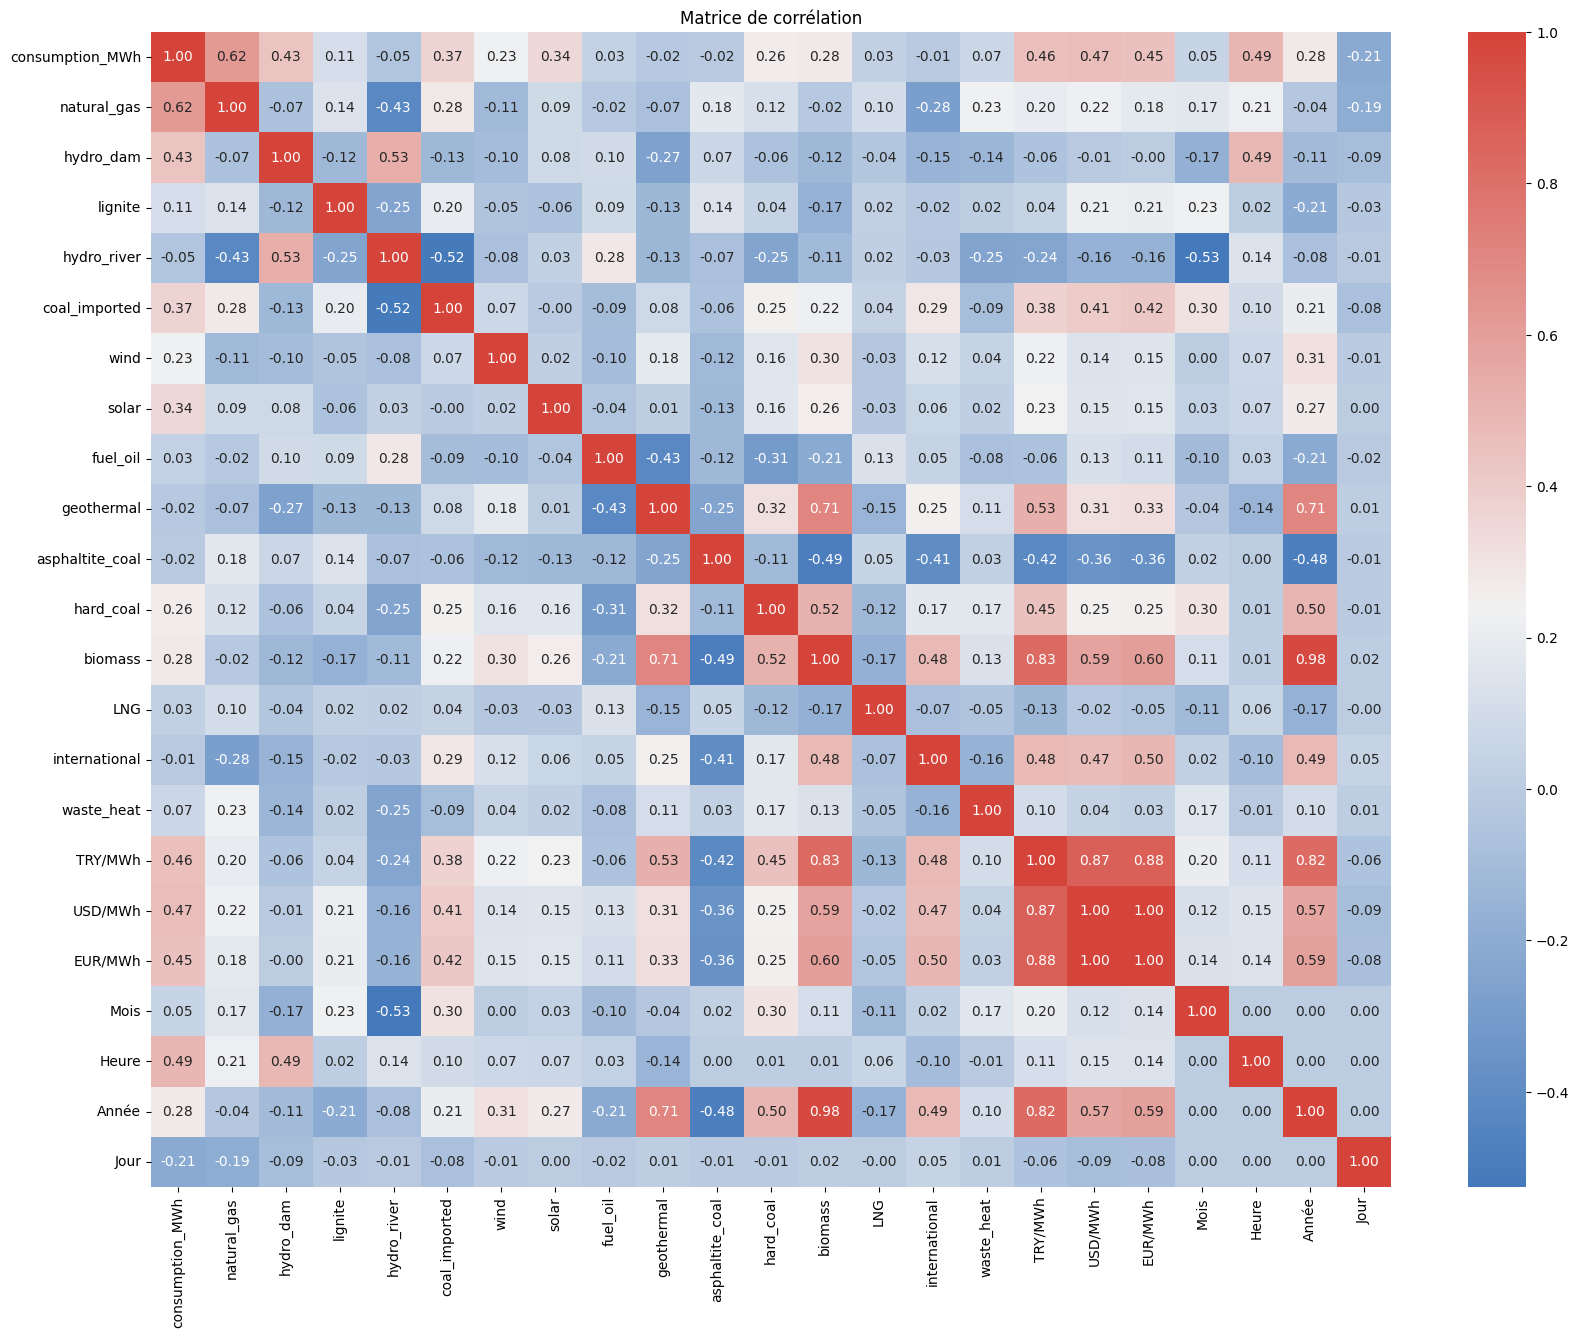

In [95]:
correlation_matrix = df.select_dtypes(include=np.number).corr(method='spearman')
cmap = sns.diverging_palette(250, 14, as_cmap=True)
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()

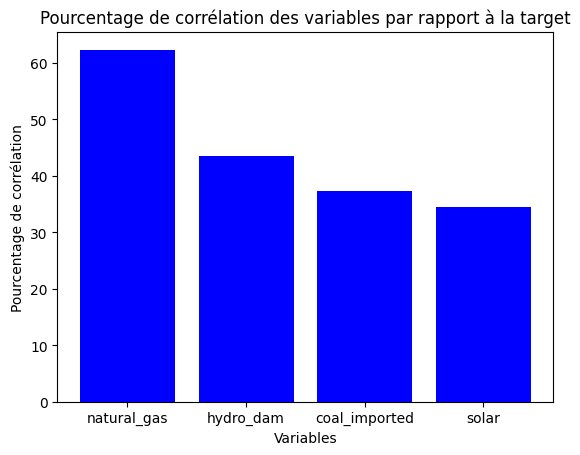

In [96]:

fig, ax = plt.subplots()

ax.bar(correlation_df['Variable'], correlation_df['Percentage'], color='blue')


ax.set_title('Pourcentage de corrélation des variables par rapport à la target')
ax.set_xlabel('Variables')
ax.set_ylabel('Pourcentage de corrélation')



ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.show()


- **natural_gas**: La corrélation entre la production d'énergie à partir du gaz naturel et la variable cible est la plus élevée parmi celles présentées, suggérant que les fluctuations dans la production de gaz naturel ont un fort impact sur la variable cible.

- **hydro_dam**: La production d'énergie des barrages hydroélectriques a une corrélation significative avec la variable cible, mais elle est moins importante que celle du gaz naturel. Cela peut être attribué aux fluctuations saisonnières dans la disponibilité de l'eau et à l'impact de la gestion des ressources en eau sur la production hydroélectrique.

- **coal_imported** : La corrélation moins significative du charbon importé par rapport à la variable cible suggère que, bien que le charbon reste une source d'énergie importante, les variations dans les importations de charbon ont un impact relativement moindre sur la consommation d'énergie par rapport au gaz naturel et à l'hydroélectricité.

- **solar**: La corrélation moins forte de la production d'énergie solaire avec la variable cible peut être due à sa dépendance aux conditions météorologiques et à sa contribution généralement plus faible au mix énergétique global. Cependant, même avec cette corrélation plus faible, la production d'énergie solaire peut encore influencer la consommation d'énergie, en particulier pendant les périodes de forte irradiation solaire.

# Data Visualisation

### 1) Analyse de la consommation d'énergie :  

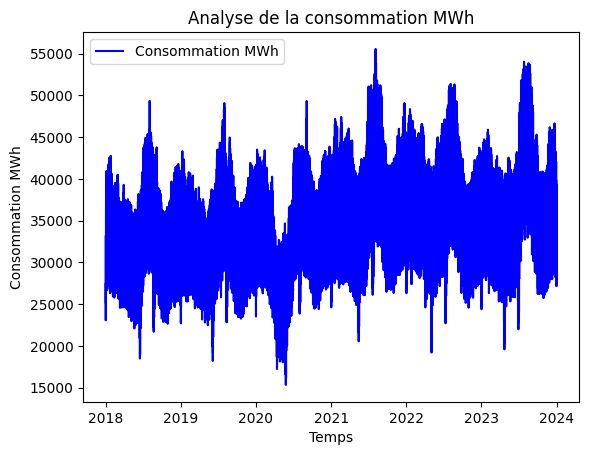

In [97]:
fig, ax = plt.subplots()


ax.plot(df['time'], df['consumption_MWh'], color='blue', label='Consommation MWh')


ax.set_title('Analyse de la consommation MWh')
ax.set_xlabel('Temps')
ax.set_ylabel('Consommation MWh')




ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')


plt.legend()
plt.show()

La consommation d'énergie montre des fluctuations significatives au fil du temps, avec une tendance haussière au fur et à mesure des années.

On peut observer des pics récurrents qui durant l'été. Les pics de consommation coïncident avec des périodes chaudes nécessitant certainement plus de climatisation. De plus, les activités estivales telles que les voyages, les loisirs et les événements peuvent entraîner une augmentation de la demande d'énergie pour alimenter les infrastructures associées, telles que les transports, les parcs d'attractions et les installations de loisirs en plein air etc...

La consommation semble avoir une certaine périodicité, avec des motifs se répétant de manière régulière, ce qui est typique pour les données de consommation d'énergie en raison des cycles de vie et économiques. En effet en 2020, on observe une baisse significative en dessous des 20 OOO MWh. Cela est notamment dû aux changements significatifs dans les habitudes de travail, les déplacements, l'industrie et les habitudes de consommation.

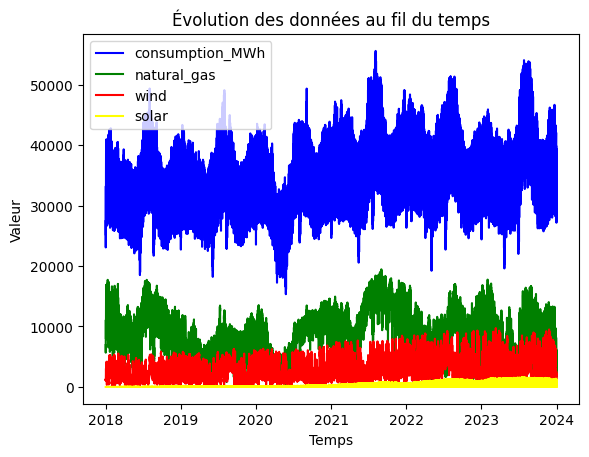

In [119]:
fig, ax = plt.subplots()


columns_to_plot = ['consumption_MWh', 'natural_gas', 'wind', 'solar']
colors = ['blue', 'green', 'red', 'yellow']
for column, color in zip(columns_to_plot, colors):
    ax.plot(df['time'], df[column], label=column, color=color)


ax.set_title('Évolution des données au fil du temps')
ax.set_xlabel('Temps')
ax.set_ylabel('Valeur')


ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')


plt.legend()


plt.show()

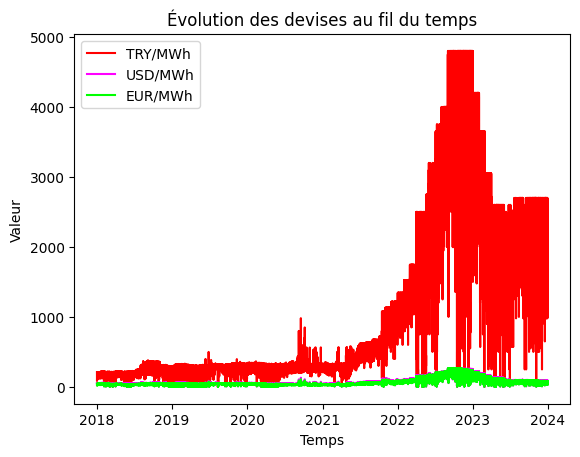

In [100]:
fig, ax = plt.subplots()


columns_to_plot = ['TRY/MWh', 'USD/MWh', 'EUR/MWh']
colors = ['red', 'magenta', 'lime']
for column, color in zip(columns_to_plot, colors):
    ax.plot(df['time'], df[column], label=column, color=color)


ax.set_title('Évolution des devises au fil du temps')
ax.set_xlabel('Temps')
ax.set_ylabel('Valeur')


ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')


plt.legend()


plt.show()

Le graphique illustre l'évolution des prix de l'énergie en mégawattheure (MWh) en trois devises différentes (TRY, USD, EUR) sur une période s'étendant de 2018 à début 2024. On peut noter trois points importants :

1. *Stabilité des devises*: Le graphique montre que les prix en USD/MWh et EUR/MWh sont relativement stables par rapport à TRY/MWh. Les lignes pour l'USD et l'EUR restent près du bas du graphique, ce qui indique que leur valeur par MWh n'a pas subi de changements drastiques au cours de la période observée. La stabilité des prix en USD et EUR suggère une moindre volatilité des marchés de l'énergie dans ces devises et une stabilité macroéconomique plus forte dans les zones où ces devises sont utilisées.

2. *Inflation de la TRY*: En revanche, le prix en TRY/MWh montre une volatilité considérable, avec une forte augmentation autour de 2021. Cette augmentation reflète l’inflation importante de la livre turque, dû à la crise économique dans la région.

3. *Comportement saisonnier et événements extraordinaires*: Les pics et les creux récurrents dans le prix en TRY/MWh représentent  le signe d'un comportement saisonnier de la demande d'énergie et des changements saisonniers des prix de l'énergie. Cependant, les anomalies très prononcées indiquent des événements non saisonniers comme la crises économique ou les catastrophes naturelles (Séisme) qui ont un impact temporaire ou permanent sur le marché de l'énergie.

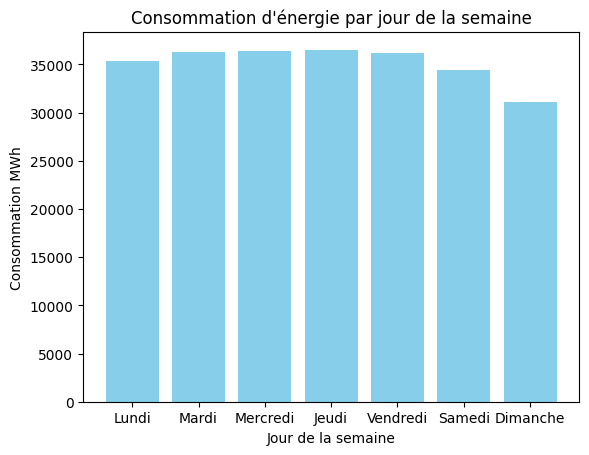

In [99]:

fig, ax = plt.subplots()

ax.bar(weekday_consumption['Jour'], weekday_consumption['consumption_MWh'], color='skyblue')


ax.set_title("Consommation d'énergie par jour de la semaine")
ax.set_xlabel('Jour de la semaine')
ax.set_ylabel('Consommation MWh')


ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.show()

La consommation d'énergie semble relativement uniforme du lundi au vendredi, ce qui pourrait indiquer un modèle de consommation stable en semaine. Ceci est souvent le cas dans les contextes où les habitudes de travail et industrielles dictent une consommation régulière pendant les jours ouvrables.

On observe une légère baisse de la consommation le samedi et le dimanche. Ce schéma est typique pour les régions où les activités commerciales et industrielles ralentissent pendant le weekend, entraînant une réduction de la demande d'énergie.

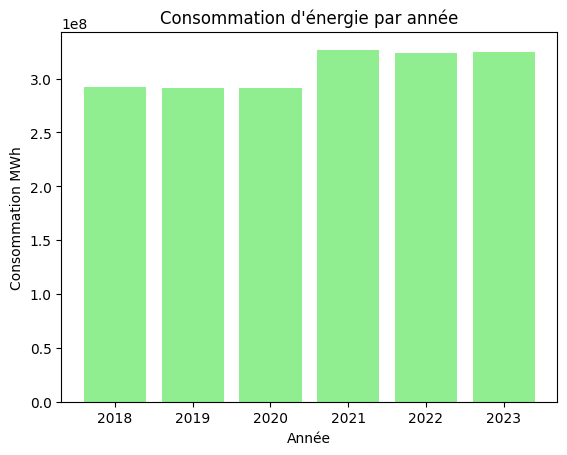

In [102]:

fig, ax = plt.subplots()

ax.bar(yearly_consumption['Année'].astype(str), yearly_consumption['consumption_MWh'], color='lightgreen')


ax.set_title("Consommation d'énergie par année")
ax.set_xlabel('Année')
ax.set_ylabel('Consommation MWh')

ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')



plt.show()

Au fil des années, on observe une stabilité de la consommation d'énergie avant et après 2021. Entre 2020 et 2021, la consommation d'energie a augmenté en moyenne de 30 millions de MWh. Après les périodes de ralentissement économique dues à la pandémie de COVID-19 en 2020, de nombreux pays ont vu une reprise économique en 2021. Cette reprise économique peut être associée à une augmentation de l'activité industrielle, commerciale et résidentielle, ce qui entraîne une demande accrue d'énergie. De plus, de nombreuses entreprises et organisations ont adopté des politiques de travail à distance pendant la pandémie, ce qui a pu réduire la consommation d'énergie dans les bureaux et les lieux de travail.

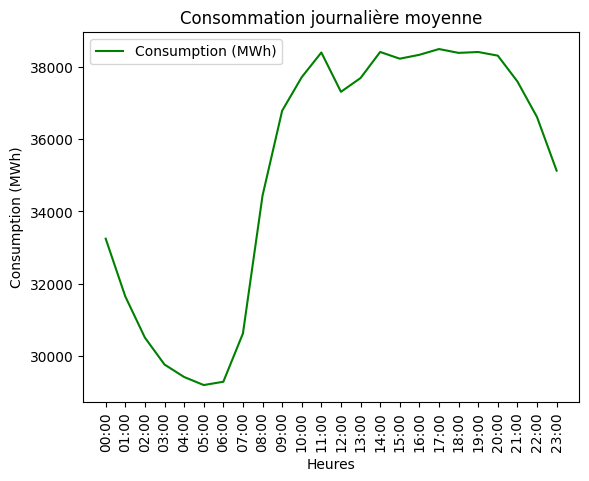

In [103]:



fig, ax = plt.subplots()

ax.plot(hourly_means.index, hourly_means, color='green', label='Consumption (MWh)')

ax.set_title("Consommation journalière moyenne")
ax.set_xlabel('Heures')
ax.set_ylabel('Consumption (MWh)')

ax.set_xticks(range(24))
ax.set_xticklabels([f"{i:02d}:00" for i in range(24)], rotation=90)


ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.legend()
plt.show()


On observe une baisse nette de la consommation en début de matinée, indiquée par la courbe qui plonge vers son point le plus bas autour de 6 heures du matin. Cela correspond généralement au moment où la plupart des gens dorment et où il y a peu d'activité industrielle ou commerciale.
On observe ensuite une augmentation rapide de la consommation dès que les gens commencent leur journée, ce qui inclut le réveil, la préparation pour le travail, et l'ouverture des entreprises et des usines, entraînant une plus grande utilisation de l'énergie pour l'éclairage, le chauffage ou la climatisation, et le fonctionnement des machines.

La courbe atteint son maximum pendant les heures de travail, entre 10 heures et 17 heures, indiquant une consommation d'énergie relativement stable et élevée tout au long de la journée. Ceci est cohérent avec les activités commerciales et industrielles.

En fin de journée, la consommation commence à décroître, probablement à mesure que les entreprises ferment, les gens rentrent chez eux et l'activité industrielle diminue. Cela se reflète dans la baisse progressive de la courbe après 20 heures.

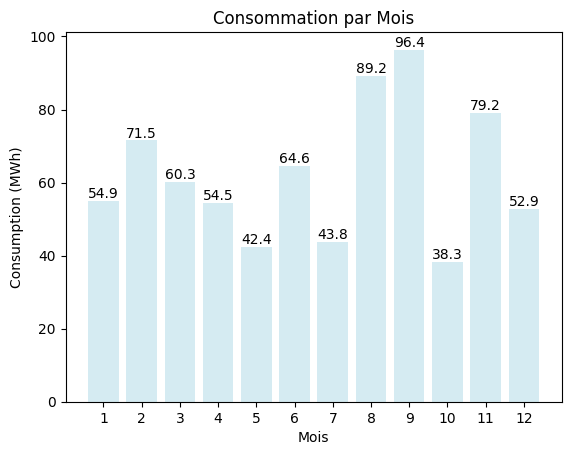

In [104]:
fig, ax = plt.subplots()
bars = ax.bar(monthly_means.index.astype(str), monthly_means, color=(173/255, 216/255, 230/255, 0.5))


for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + space, f'{yval:.1f}', ha='center', va='bottom', color='black')

ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')




ax.set_title("Consommation par Mois", color='black')
ax.set_xlabel('Mois', color='black')
ax.set_ylabel('Consumption (MWh)', color='black')


plt.show()

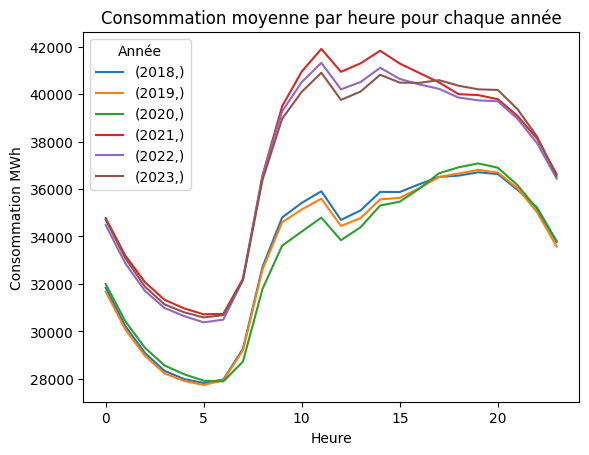

In [106]:

# Creating the line plot
fig, ax = plt.subplots()

# Differentiating each year's data with unique color
colors = plt.cm.viridis(np.linspace(0, 1, len(dum['Année'].unique())))

for (year), group in dum.groupby(['Année']):
    ax.plot(group['Heure'], group['consumption_MWh'], label=year)

# Setting titles and labels
ax.set_title('Consommation moyenne par heure pour chaque année')
ax.set_xlabel('Heure')
ax.set_ylabel('Consommation MWh')

# Customizing the plot appearance
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Adding legend
ax.legend(title='Année')

# Show the plot
plt.show()


Le graphique présente la consommation moyenne d'énergie en mégawattheures (MWh) à différentes heures de la journée, sur plusieurs années, de 2018 à 2023. Chaque année suit un motif similaire, avec la consommation la plus faible tôt le matin, une augmentation rapide le matin, un plateau pendant la journée, et une diminution en soirée.

Il y a une tendance à la hausse de la consommation d'énergie de 2020 à 2022 pendant les heures de pointe. Cela pourrait être le signe d'une augmentation des activités nécessitant de l'énergie, ou alors à l'augmentation de la population, à l'industrialisation ou à d'autres facteurs économiques, notamment à la période "après" COVID-19. L'année 2023 montre une consommation similaire ou légèrement réduite par rapport à 2022. Cela pourrait indiquer une amélioration de l'efficacité énergétique, une prise de conscience accrue pour l'économie d'énergie, ou des changements dans les sources d'énergie utilisées.

#### Création de la colonne déficit :

In [107]:
# Déficit :
df1["deficit_MWh"] = df1["consumption_MWh"] - df1["total_generation_MWh"]

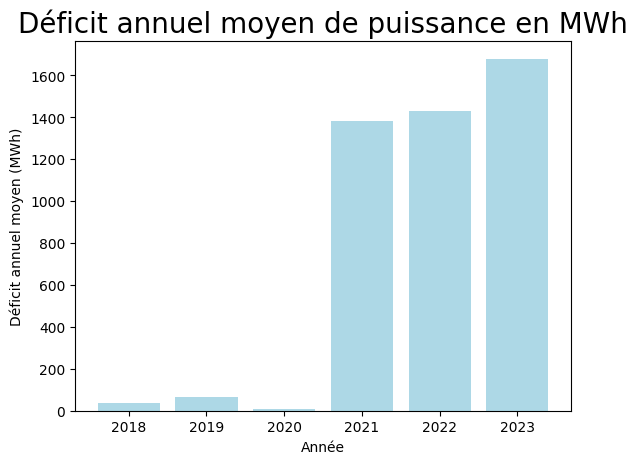

In [108]:
# Creating the bar plot
fig, ax = plt.subplots()

ax.bar(Yearly_deficit['time'].astype(str), Yearly_deficit['deficit_MWh'], color='lightblue')

# Set title and labels
ax.set_title('Déficit annuel moyen de puissance en MWh', fontsize=20)
ax.set_xlabel('Année')
ax.set_ylabel('Déficit annuel moyen (MWh)')


# Customizing the plot appearance
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Show the plot
plt.show()

Le graphique que vous avez partagé montre l'évolution annuelle de la consommation et de la production d'énergie (en MWh) de 2018 à 2023. Les lignes représentent la consommation d'énergie (en bleu) et la production d'énergie (en orange) sur plusieurs années. Idéalement, la production doit rencontrer ou dépasser la consommation pour maintenir un équilibre énergétique. On constate une augmentation soudaine et significative de la consommation et de la production en 2020. Cela pourrait suggérer une réponse à la crise qui a augmenté la demande d'énergie.

En effet, même si la Turquie a investi massivement dans les énergies renouvelables notamment l'éolien et le solaire, elle dépend largement des importations d'énergie pour répondre à sa demande, notamment en gaz naturel et en pétrole. Les fluctuations des prix sur les marchés internationaux peuvent influencer le coût de l'énergie et contribuer à des déséquilibres entre la demande et la production. Ces investissements visent cependant à accroître la part des énergies propres dans le mix énergétique du pays et à réduire les émissions de gaz à effet de serre.
Le marché de l'énergie en Turquie est donc depuis 2018 caractérisé par une croissance de la consommation d'énergie, des investissements dans les énergies renouvelables et des politiques énergétiques nationales, ce qui pourrait expliquer cette hausse de la consommation par rapport à la production.

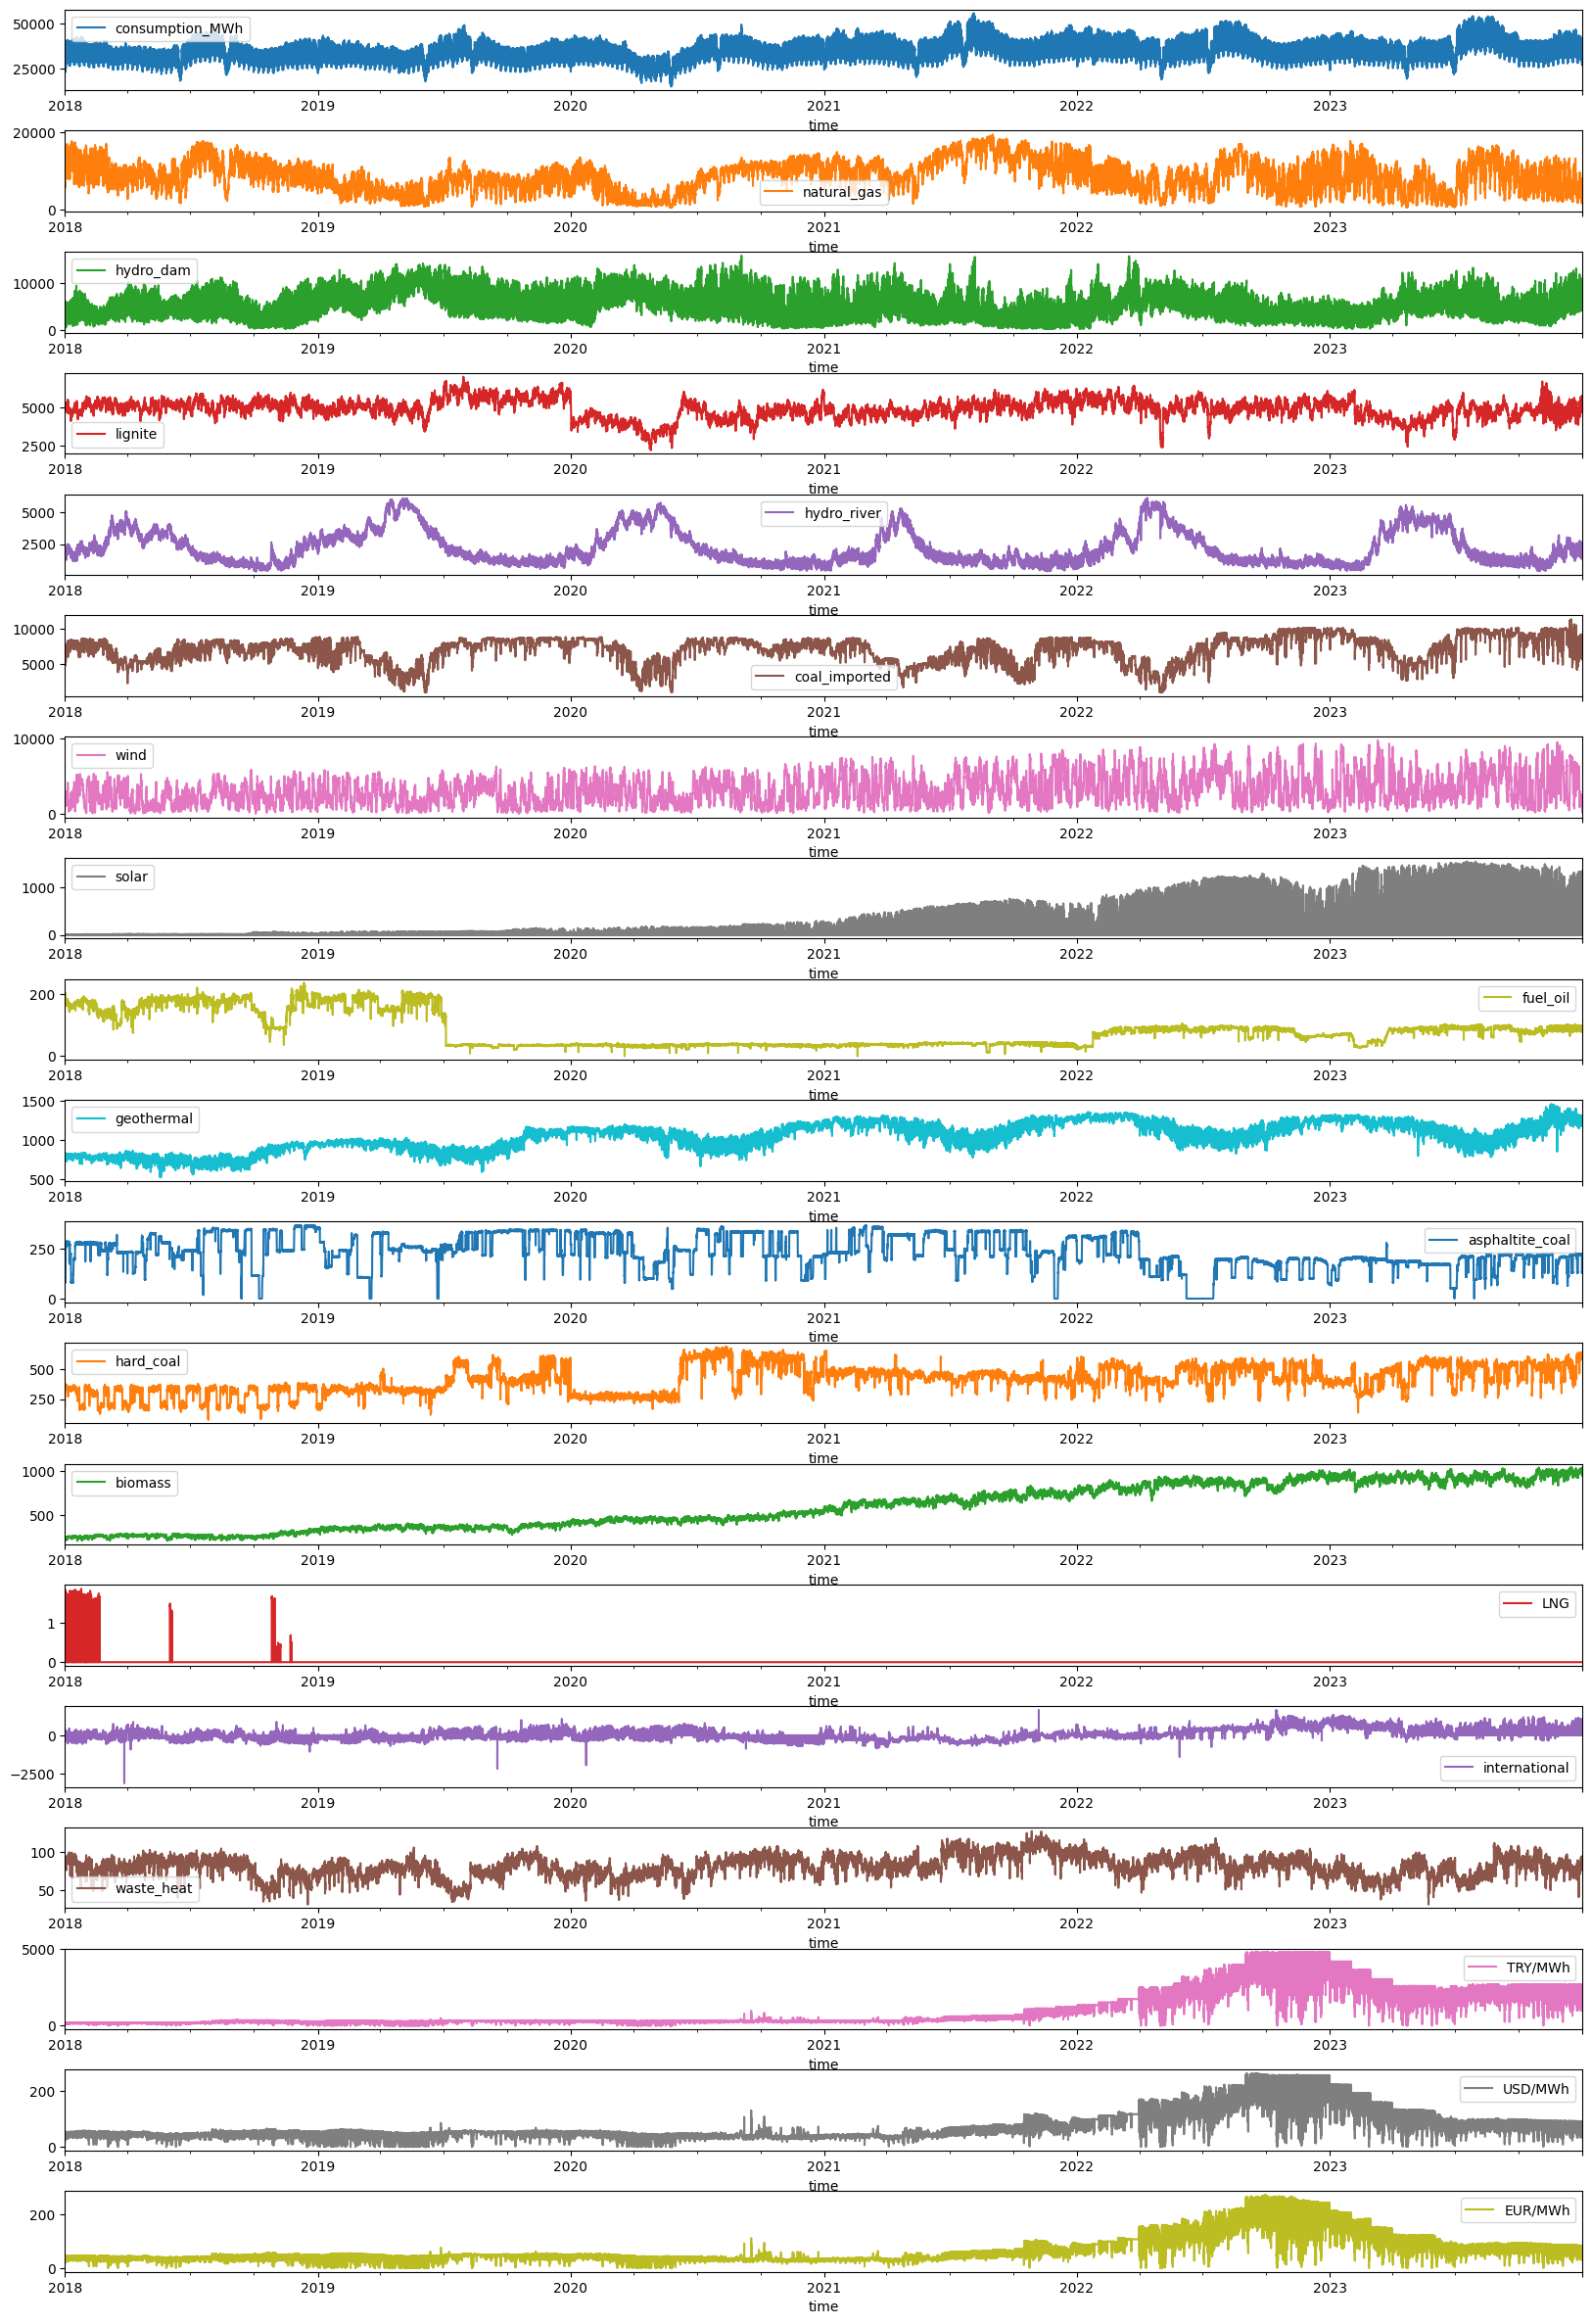

In [109]:
time_columns = ['time','Mois', 'Heure', 'Jour', 'Année']
cols_to_plot = [col for col in df.columns if col not in time_columns]
df_indexed = df.set_index('time')
df_indexed[cols_to_plot].plot(subplots=True, figsize=(20, 30), sharex=False)
plt.subplots_adjust(hspace=0.5)
plt.show()

Ces graphes nous montrent l'évolution de nos variables explicatives dans le temps, nous permettant d'observe de relatives saisonnalité ou tendances au cours du temps. La première ligne de graphique représente la consommation d'énergie, qui varie au fil du temps, avec une légère tendance générale à la hausse, indiquant une croissance continue de la demande énergétique.

Les graphiques suivants représentent différentes sources d'énergie comme le gaz naturel, l'hydroélectricité des barrages, le lignite, etc. Chaque source a son propre profil de production et de variation dans le temps, reflétant des facteurs comme la politique énergétique, les conditions climatiques et les capacités de production.

Ensuite, les sources d'énergie éolienne et solaire montrent des tendances qui pourraient indiquer une croissance de la production, ce qui est cohérent avec les investissements mondiaux croissants dans les énergies renouvelables. Les combustibles fossiles tels que le charbon importé présentent des tendances qui peuvent être affectées par les changements de réglementation, les coûts de marché ou les initiatives de décarbonation.

Enfin, les dernières lignes de graphique montrent le prix de l'énergie dans les différentes devises. Il y a des fluctuations notables qui peuvent être dues à des facteurs économiques mondiaux, des changements dans les politiques énergétiques, des fluctuations de taux de change, ou des crises énergétiques.

### 2) Analyse des différents types d'énergie

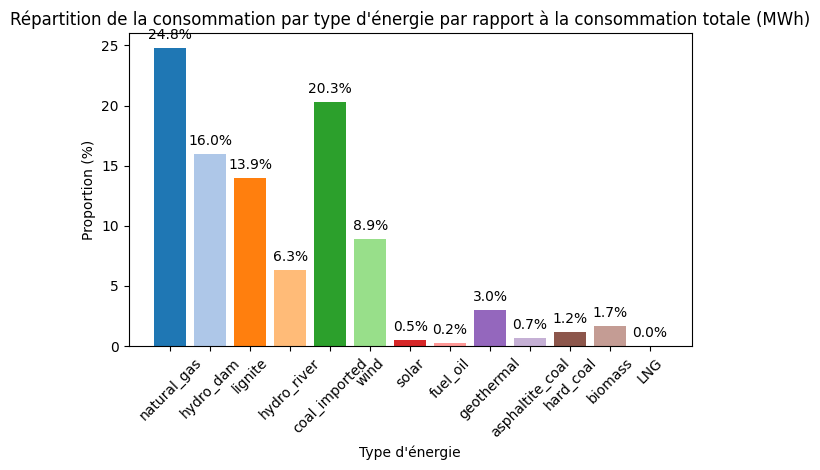

In [110]:
# Contribution de chaque type d'energie à la consommation totale :
type = ['natural_gas', 'hydro_dam', 'lignite', 'hydro_river', 'coal_imported',
        'wind', 'solar', 'fuel_oil', 'geothermal', 'asphaltite_coal',
        'hard_coal', 'biomass', 'LNG']
total_cons_by_energy = df[type].sum()
total_consumption = df['consumption_MWh'].sum()
proportion_by_energy = total_cons_by_energy / total_consumption * 100


fig, ax = plt.subplots()
bars = ax.bar(proportion_by_energy.index, proportion_by_energy, color=plt.cm.tab20.colors)


for i, v in enumerate(proportion_by_energy):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom', color='black')


ax.set_title('Répartition de la consommation par type d\'énergie par rapport à la consommation totale (MWh)')
ax.set_xlabel('Type d\'énergie')
ax.set_ylabel('Proportion (%)')

ax.set_facecolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black', rotation=45)
ax.tick_params(axis='y', colors='black')

plt.tight_layout()


plt.show()


Ce diagramme en camembert illustre la répartition de la consommation d'énergie par type d'énergie par rapport à la consommation totale, mesurée en mégawattheures (MWh).

Le Gaz Naturel constitue la plus grande part de la consommation totale avec 25.5%. Cela indique que le gaz naturel est probablement la principale source d'énergie pour cette région ou ce pays.

Le charbon Importé représente lui 20.8% de la consommation, ce qui suggère que le charbon reste une source d'énergie significative.

L'Éolienne représente 9.16% de la part, ce qui montre une contribution notable à l'approvisionnement en énergie. Le Biomasse, charbon dur, asphaltite, énergie solaire, fioul et gaz naturel liquéfié (LNG) composent de plus petites fractions du total, avec des valeurs individuelles allant de moins de 1% à 1.72%.

Tous ces résultats font liens avec les interprétations faites ci-dessus, et notamment de l'envie de la Turquie d'investir dans des ressources renouvelables.

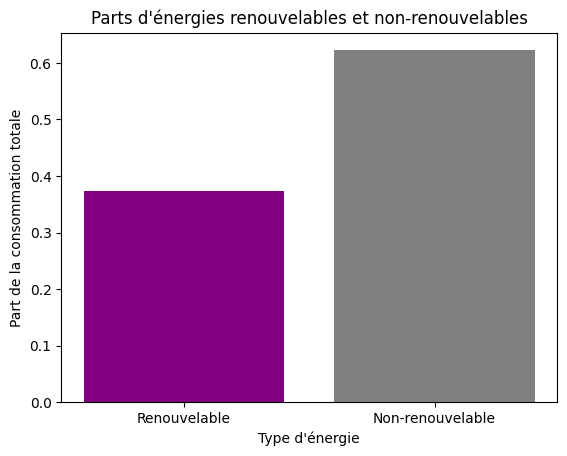

In [111]:

fig, ax = plt.subplots()
ax.bar(['Renouvelable', 'Non-renouvelable'], [renewable_share, non_renewable_share], color=['purple', 'grey'])


ax.set_title("Parts d'énergies renouvelables et non-renouvelables")
ax.set_xlabel('Type d\'énergie')
ax.set_ylabel('Part de la consommation totale')


ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')


plt.show()


In [125]:
# Définition des groupes d'énergie
energy_groups = {
    'fossil_fuel_MWh': ['natural_gas', 'lignite', 'coal_imported', 'fuel_oil', 'asphaltite_coal', 'hard_coal'],
    'renewable_energy_MWh': ['hydro_dam', 'hydro_river', 'wind', 'solar', 'geothermal', 'biomass'],
    'alternative_energy_MWh': ['LNG', 'international', 'waste_heat']
}



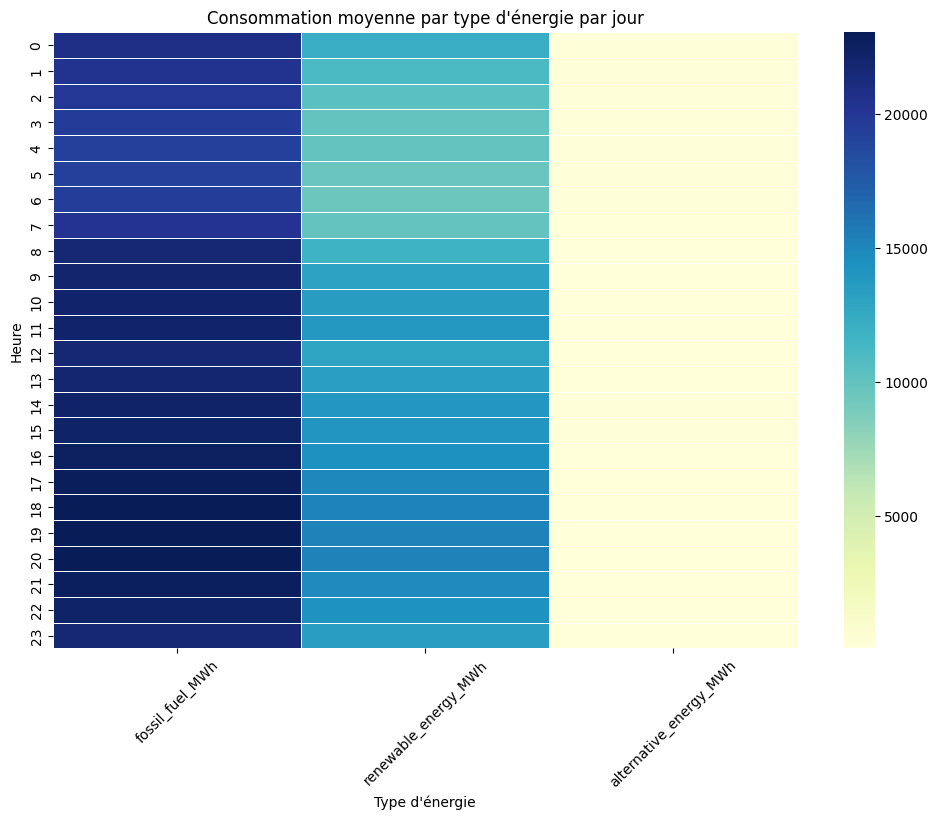

In [127]:
# Consommation par type d'energie au fil de la journée :

# Colonnes des différents types d'énergie
cols =['fossil_fuel_MWh', 'renewable_energy_MWh', 'alternative_energy_MWh']

energy_day = df.groupby(['Heure'])[cols].mean().reset_index()
heatmap_data = energy_day.set_index('Heure')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu",  fmt=".2f", linewidths=.5)
plt.title("Consommation moyenne par type d'énergie par jour")
plt.xlabel("Type d'énergie")
plt.ylabel("Heure")
plt.xticks(rotation=45)
plt.show()

Ce graphique représente la consommation moyenne d'énergie par type d'énergie et par jour. Il y a trois catégories d'énergie: combustible fossile (fossil_fuel_MWh), énergie renouvelable (renewable_energy_MWh) et énergie alternative (alternative_energy_MWh).

Les nuances plus foncées représentent une consommation élevée. Le graphique indique clairement que la consommation de combustibles fossiles est nettement plus élevée par rapport aux énergies renouvelables et alternatives pour chaque jour de la semaine. Les énergies renouvelables et alternatives montrent une consommation beaucoup plus basse.

Les barres sont divisées en jours de la semaine, ce qui suggère une analyse de la consommation énergétique par jour de la semaine pour chaque type d'énergie. Encore une fois, les couleurs pour les 3 types d'énergies sont plus clairs tôt le matin, ce qui parait logique aux vues des interprétations faites précedements.


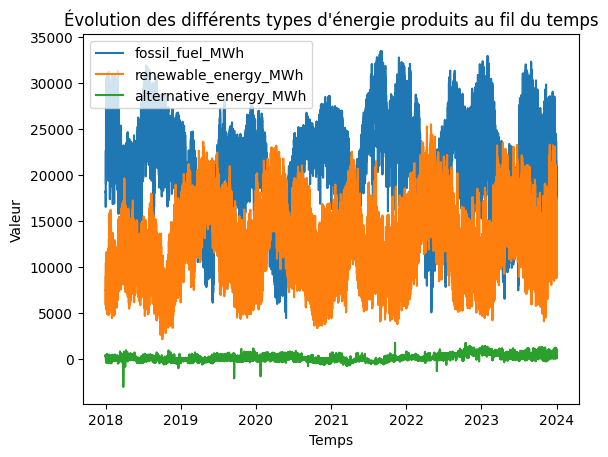

In [128]:

fig, ax = plt.subplots()

for column in cols:
    ax.plot(df['time'], df[column], label=column)


ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')


ax.set_title('Évolution des différents types d\'énergie produits au fil du temps')
ax.set_xlabel('Temps')
ax.set_ylabel('Valeur')


ax.legend()

plt.show()


Le graphique trace l'évolution de la production d'énergie par type au fil du temps, couvrant les années de 2018 à 2024.
La courbe en violette, qui représente la production d'énergie à partir de combustibles fossiles, montre des pics et des creux tout au long des années, indiquant des variations significatives dans la production. Cette catégorie semble être la plus grande contributrice à la production d'énergie globale. On voit que se pic à la hausse intervient en fin d'année, tandis que le pic de baisse en début d'année.

La zone en rouge indique la production d'énergie renouvelable. Elle montre une tendance générale légèrement à la hausse sur la période, indiquant un investissement croissant dans les énergies renouvelables ou l'impact des politiques favorisant une production d'énergie plus durable.

La zone en turquoise, bien que significativement plus petite que les autres catégories, représente probablement des formes d'énergie alternatives ou émergentes.

On remarque que les tendances entre l'énergie renouvelable et l'énergie à partir de combustibles fossiles se comportent de manière symétrique : lorsque l'une est en hausse, l'autre est en baisse et inversement.

# Tests de stationnarités :

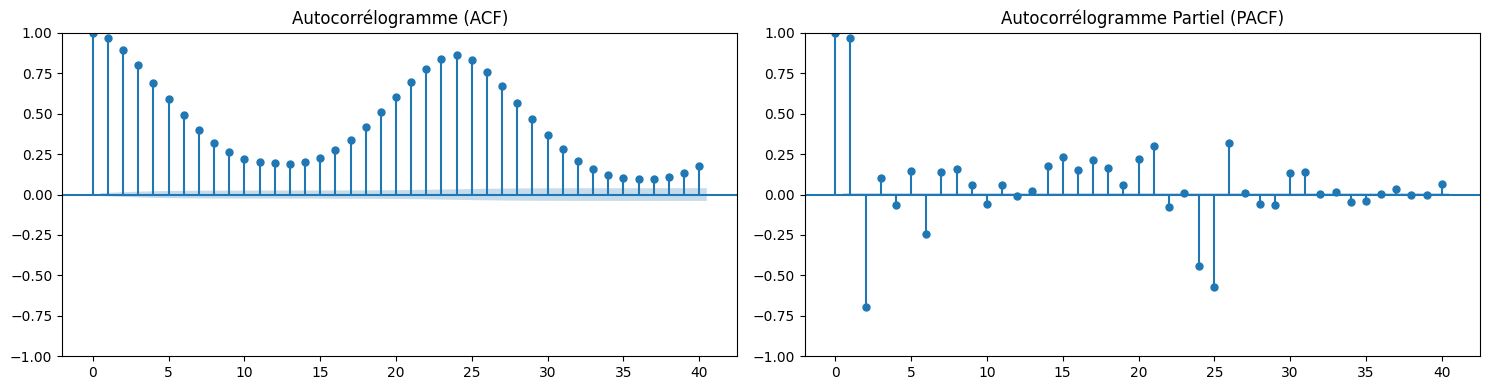

In [115]:
def plot_acf_pacf(series, lags=40):
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    plot_acf(series, lags=lags, ax=axes[0], alpha=0.05)
    axes[0].set_title('Autocorrélogramme (ACF)')
    plot_pacf(series, lags=lags, ax=axes[1], alpha=0.05, method='ywm')
    axes[1].set_title('Autocorrélogramme Partiel (PACF)')
    plt.tight_layout()
    plt.show()

plot_acf_pacf(df['consumption_MWh'])

Deux graphiques sont représentés ici, un autocorrélogramme (ACF) et un autocorrélogramme partiel (PACF), qui sont des outils utilisés en statistiques pour analyser les propriétés des séries temporelles.

**ACF** :
- La décroissance progressive des pics indique qu'il y a une corrélation positive qui diminue avec l'augmentation des lags.
- La nature de la décroissance suggère une saisonnalité dans les données. Les pics et les creux périodiques indiquent les points de temps où les données sont positivement ou négativement corrélées avec elles-mêmes à ces décalages.

**PACF** :
- Le premier pic significatif se situe après le premier décalage, puis la plupart des autres pics sont dans la zone d'insignifiance (à l'intérieur des lignes horizontales bleues), ce qui indique que ces décalages supplémentaires n'apportent pas d'informations supplémentaires significatives une fois l'effet du premier décalage retiré.

**Implications pour la modélisation des séries temporelles** :
- L'ACF et le PACF suggèrent qu'un modèle ARIMA (AutoRegressive Integrated Moving Average) pourrait être approprié pour ces données, avec un ordre AR possible à 1 d'après le PACF.
- La saisonnalité détectée par l'ACF peut nécessiter un modèle SARIMA (Seasonal ARIMA) pour traiter à la fois la non-stationnarité et la saisonnalité des données.
- Il est important de réaliser un test de stationnarité, comme le test Dickey-Fuller augmenté, pour confirmer si les données sont stationnaires ou non avant de décider d'intégrer (différencier) les données dans le modèle ARIMA.

Ces analyses sont essentielles pour la construction de modèles de séries temporelles précis qui peuvent être utilisés pour la prévision dans des domaines tels que la finance, la météorologie, l'économie et bien d'autres.

### Tableau récapitulatif :

In [129]:
def stationnarite(data, vars_list):
    sig = 0.04
    stationnaires = []
    res_df_rows = []
    loop = 1
    for x in vars_list:
        adf_result = adfuller(data[x], regression='c')
        pp_result = PhillipsPerron(data[x])
        kpss_result = kpss(data[x],  regression='c')
        if (adf_result[1] < sig and pp_result.pvalue < sig) or (adf_result[1] < sig and  kpss_result[1] > sig) or (kpss_result[1] > sig):
            flg = "Stationnaire"
            stationnaires.append(x)
        else:
            flg = "Non Stationnaire"
        res_df_rows.append({'VARS': x.upper(),
                            'ADF TEST': adf_result[0],
                            'P-VALUE FOR ADF TEST': adf_result[1],
                            'KPSS TEST': kpss_result[0],
                            'P-VALUE FOR KPSS TEST': kpss_result[1],
                            'STATIONNARITE': flg})
        loop += 1

    res_df = pd.DataFrame(res_df_rows)
    res_df = res_df.sort_values(by=['VARS'])
    data = data[stationnaires]
    return stationnaires, res_df, data

time_columns = ['Mois', 'Heure', 'Jour', 'Année']
column_plot = df.select_dtypes(include=np.number).columns
vars_to_analyze = [col for col in column_plot if col not in time_columns]
stationnaires, res_df, var_macro = stationnarite(df, vars_to_analyze)
res_df

,VARS,ADF TEST,P-VALUE FOR ADF TEST,KPSS TEST,P-VALUE FOR KPSS TEST,STATIONNARITE
21,ALTERNATIVE_ENERGY_MWH,-6.729139,3.330325e-09,15.567972,0.01,Stationnaire
10,ASPHALTITE_COAL,-10.424534,1.670993e-18,8.293562,0.01,Stationnaire
12,BIOMASS,-1.291139,6.332166e-01,37.956807,0.01,Non Stationnaire
5,COAL_IMPORTED,-7.188628,2.537830e-10,2.378234,0.01,Stationnaire
0,CONSUMPTION_MWH,-13.001431,2.682232e-24,11.156222,0.01,Stationnaire
18,EUR/MWH,-4.990601,2.316359e-05,18.369800,0.01,Stationnaire
19,FOSSIL_FUEL_MWH,-10.294101,3.507803e-18,0.991665,0.01,Stationnaire
8,FUEL_OIL,-2.858725,5.036252e-02,12.810384,0.01,Non Stationnaire
9,GEOTHERMAL,-3.340594,1.315860e-02,23.017580,0.01,Stationnaire
11,HARD_COAL,-8.081977,1.453203e-12,13.667133,0.01,Stationnaire


Voici les résultats des tests de stationnarité pour différentes variables de notre série temporelle, spécifiquement les tests Augmented Dickey-Fuller (ADF) et Kwiatkowski-Phillips-Schmidt-Shin (KPSS).

- **ADF Test**: Ce test vérifie la présence d'une racine unitaire dans une série temporelle. Les valeurs négatives dans la colonne "ADF Test" indiquent la statistique de test pour chaque variable. Plus cette valeur est négative, plus la preuve contre la présence d'une racine unitaire (et donc pour la stationnarité) est forte.

- **P-Value for ADF Test**: Les valeurs p associées aux tests ADF sont utilisées pour déterminer la significativité statistique des résultats du test. Une valeur p inférieure au seuil de 5% suggère que la série temporelle est stationnaire.

- **KPSS Test**: Contrairement à l'ADF, le test KPSS teste la nullité de la stationnarité autour d'une tendance. Des valeurs p basses (inférieures à 0.05) indiquent la non-stationnarité de la série.

- **P-Value for KPSS Test**: La colonne "P-Value for KPSS Test" montre les valeurs p pour le test KPSS. Ici, une valeur p élevée suggère que la série est stationnaire.

- **Stationnarité**: La dernière colonne résume les résultats des deux tests.

Nos résultats montrent que la plupart des variables semblent être stationnaires selon le test ADF, avec des valeurs p très faibles, ce qui suggère que l'on peut rejeter l'hypothèse d'une racine unitaire. Cependant, pour le test KPSS, certaines variables telles que "BIOMASS" et "FUEL_OIL" présentent des valeurs p inférieures au seuil de 0.05, ce qui indique que ces séries pourraient ne pas être stationnaires autour d'une tendance.

Faire ces tests représentent une étape cruciales pour déterminer les étapes appropriées dans la modélisation des séries temporelles, telles que la nécessité de différenciation pour atteindre la stationnarité, un prérequis pour de nombreux modèles de prévision temporelle.

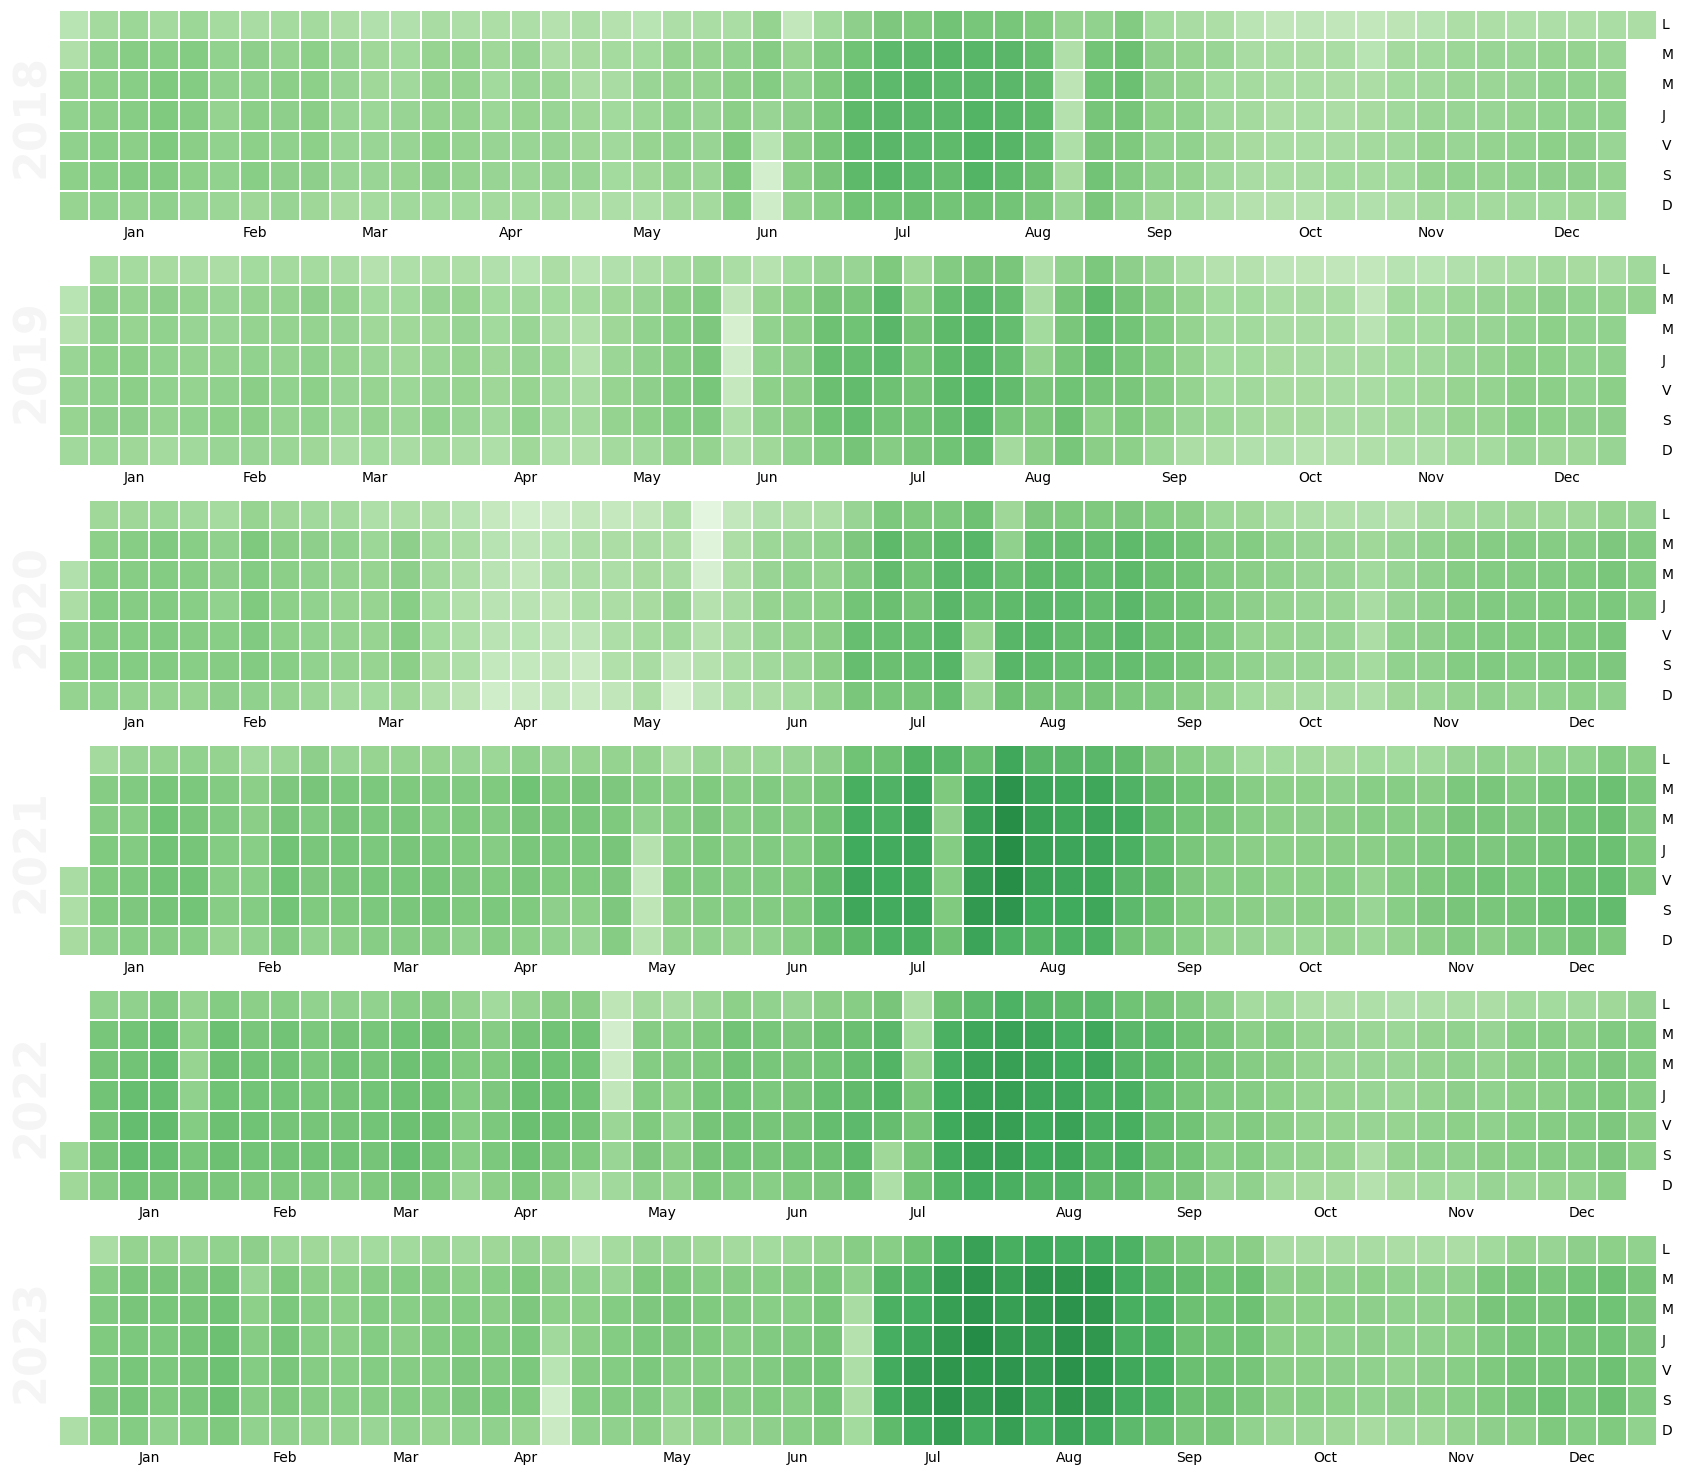

In [117]:
serie_temporelle = df.set_index('time')['consumption_MWh']
calmap.calendarplot(serie_temporelle, monthticks=3, daylabels='LMMJVSD', cmap='Greens',
                    linewidth=0.2, fig_kws=dict(figsize=(24, 15)))
plt.show()

Voici la "heatmaps" pour les années 2018 à 2023. La heatmap représente chaque un mois de l'année, et chaque case au sein de cette ligne représente un jour du mois. La teinte de chaque case reflète l'intensité de la consommation d'energie mesuré chaque jour.

Dans cette heatmap, les cases plus foncées suggèrent des valeurs plus élevées pour le paramètre mesuré, tandis que des cases plus claires indiquent des valeurs plus basses. Cela permet d'observer rapidement les tendances, les modèles et les anomalies sur une période prolongée.

Si les cases plus foncées apparaissent pendant des périodes spécifiques de l'année, cela indique bien la présence de tendances saisonnières. Ici, les cases plus foncées apparaîssent pendant les mois d'été, ce qui signifie une consommation d'énergie accrue due à l'utilisation de la climatisation par exemple, ou aux fortes activités durant cette période, la Turquie étant une destination priser en été.
De plus, comme dit juste avant, plus les années passent, plus les couleurs foncés se densifient et plus la consommation d'énergie augmentent les été.


De plus, tous les ans entre Mai et Avril, la couleur du heatmaps est très clair, indiquant une consommation d'énergie faile à cette période. Cela ce caractérise peut être par un temps doux, qui ne nécessite pas l'utilisation ni de climatisation ni de chauffage.